<a href="https://colab.research.google.com/github/blowmeaway1234/Machine-Learning/blob/main/SELFCODE_Linear_Regression_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib as plt
%matplotlib inline

# CODE BIG MART

FEATURE AFFECT THE TARGET VARIABLE

    1. Time of the week
    2. Time of the day
    3. Time of the year
    4. Store size and location
    5. The item in question

Read File

In [719]:
train = pd.read_csv('train.csv')
test = pd.read_csv('Test.csv')

In [720]:
# Test Columns and rows
train.shape

(8523, 12)

In [721]:
# Test Columns and rows
test.shape

(5681, 11)

In [722]:
# Print name comlumns
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [723]:
# Combine train and test into file to perform EDA
train["source"]="train"
test["source"]="test"
data = pd.concat([train,test],ignore_index = True)
print(data.shape)

(14204, 13)


In [724]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [725]:
# Describle function for numberical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [726]:
# Checking for missing value
# 2439,4016,5681 missing value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [727]:
# Print the unique values in the Item_Fat_Content columns, which 2 unique types of fat content : low fat and regular
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [728]:
# Print the unique values in the Outlet_Establishment_Year columns, where the date ranges from 1985 - 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [729]:
# Caculate the Outlet_Age
data["Outlet_Age"]=2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [730]:
# Unique values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [731]:
# Print the value
# low fat most abandunt
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [732]:
data["Outlet_Size"].value_counts()
# Regular : Medium

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [733]:
# Use the mode function to find out the most common value in Outlet_Size
# -> medium most common
data["Outlet_Size"].mode()[0]

'Medium'

In [734]:
# Replace missing value for Item_Weight and Outlet_Size 
# Replace missing value for Item_Weight mean weight: mean() 
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [735]:
# Replace missing value for Out_Size -> medium: mode()[0]
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

<Axes: >

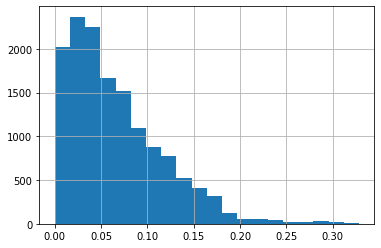

In [736]:
data["Item_Visibility"].hist(bins=20)

In [737]:
# Detecting outliers:
# An outlier is da point that lies outside the overall pattern in distribution
# A commenly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quartile or below the first quartile
# Using this, one can remove the outliers and output the resulting data in fill_data variable
Q1=data["Item_Visibility"].quantile(0.25)

In [738]:
# Caculate the second quantile
Q3=data["Item_Visibility"].quantile(0.75)

In [739]:
# Caculate the interquartile rang (IQR)
IQR = Q3 - Q1

In [740]:
# IQR range is know, remove the outliers from the data
# The resulting data is stared in fill_data variable
fill_data = data.query('(@Q1 - 1.5 *@IQR) <= Item_Visibility <= (@Q3 + 1.5 *@IQR)')

In [741]:
# Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [742]:
# Check the shape of the resulting dataset without th outliers
fill_data.shape

(13943, 14)

In [743]:
data.shape

(14204, 14)

In [744]:
# Assign fill_data dataset to data DataFrame
data= fill_data

In [745]:
data.shape

(13943, 14)

In [746]:
# Modifi Item_Visibility by converting the numeriacal values into the categories low Visibility and High Visibility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000,0.065,0.130,0.200],labels = ['Low Viz', 'Viz', 'High Viz'])

In [747]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [748]:
# Replace null values with low visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan,"Low Viz",regex=True)

In [749]:
#Replace all other representation of low fat with low fat
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")

In [750]:
#Replace all representation of reg with Regular
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace("reg","Regular")

In [751]:
#Print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [752]:
#Code all categories variable as numeric using "LabelEncoder" from sklearn's processing module
# - > chuyển dữ liệu phân loại thành dạng số
#Initialize the label encoder
le=LabelEncoder()

In [753]:
# Transform Item_Fat_Content
data["Item_Fat_Content"] = le.fit_transform(data["Item_Fat_Content"])

In [754]:
# Transform Item_Visibility_bins
data["Item_Visibility_bins"] =le.fit_transform(data["Item_Visibility_bins"])

In [755]:
# Transform Outlet_location_Type
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])

In [756]:
# Transform Outlet_Size
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])


In [757]:
# Print the unique values of Outlet_Type
data['Outlet_Size'].unique()

array([1, 0, 2])

In [758]:
# Create dummies for Outlet_Type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [759]:
# Explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [760]:
# As mutiple categories are present in Item_Identifier
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({'FD': 'Food',
                                                           'NC': 'Non-Consumble',
                                                           'DR': 'Drinks'})


In [761]:
# Only three catagories are present in an Item_Type_Combined column.
data['Item_Type_Combined'].value_counts()

Food             9991
Non-Consumble    2652
Drinks           1300
Name: Item_Type_Combined, dtype: int64

In [762]:
data.shape

(13943, 16)

In [763]:
#Perform one-hot encoding for all columns as the model an numeriacal values and not an categorical_value
data = pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Type_Combined"])

In [764]:
data.dtypes

Item_Identifier                      object
Item_Weight                         float64
Item_Visibility                     float64
Item_Type                            object
Item_MRP                            float64
Outlet_Identifier                    object
Outlet_Establishment_Year             int64
Item_Outlet_Sales                   float64
source                               object
Outlet_Age                            int64
Item_Visibility_bins                  int64
Item_Fat_Content_0                    uint8
Item_Fat_Content_1                    uint8
Outlet_Location_Type_0                uint8
Outlet_Location_Type_1                uint8
Outlet_Location_Type_2                uint8
Outlet_Size_0                         uint8
Outlet_Size_1                         uint8
Outlet_Size_2                         uint8
Outlet_Type_Grocery Store             uint8
Outlet_Type_Supermarket Type1         uint8
Outlet_Type_Supermarket Type2         uint8
Outlet_Type_Supermarket Type3   

In [765]:
import warnings 
warnings.filterwarnings('ignore')
# Drop the column which have been converted to different types
data.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)

# Divide the dataset created earliear into train and datasets
train= data.loc[data["source"]=='train']
test= data.loc[data["source"]=='test']

# Drop unnecessary columns
test.drop(["Item_Outlet_Sales"],axis=1, inplace =True)
train.drop(['source'],axis=1,inplace=True)

# Export modified version of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv",index=False)


In [766]:
# Read the train modified.csv and text modified.csv dataset
train2= pd.read_csv("train_modified.csv")
test2=pd.read_csv("test_modified.csv")

In [767]:
#Print the data types train2 colums
train2.dtypes

Item_Identifier                      object
Item_Weight                         float64
Item_Visibility                     float64
Item_MRP                            float64
Outlet_Identifier                    object
Item_Outlet_Sales                   float64
Outlet_Age                            int64
Item_Visibility_bins                  int64
Item_Fat_Content_0                    int64
Item_Fat_Content_1                    int64
Outlet_Location_Type_0                int64
Outlet_Location_Type_1                int64
Outlet_Location_Type_2                int64
Outlet_Size_0                         int64
Outlet_Size_1                         int64
Outlet_Size_2                         int64
Outlet_Type_Grocery Store             int64
Outlet_Type_Supermarket Type1         int64
Outlet_Type_Supermarket Type2         int64
Outlet_Type_Supermarket Type3         int64
Item_Type_Combined_Drinks             int64
Item_Type_Combined_Food               int64
Item_Type_Combined_Non-Consumble

In [768]:
# Drop the irrelevant variables from train2 dataset
# Creat the independent variable x_train and dependent variable y_train
X_train =train2.drop(["Item_Outlet_Sales","Outlet_Identifier","Item_Identifier"],axis=1)
y_train =train2.Item_Outlet_Sales

In [769]:
# Drop those irreilevant variables from test2 dataset
X_test = test2.drop(["Outlet_Identifier","Item_Identifier"],axis=1)

In [770]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,source,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumble
0,20.750000,0.007565,107.8622,test,19,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,test,11,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,test,20,2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,test,11,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,test,33,2,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,test,21,1,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
5564,7.600000,0.142991,169.1448,test,9,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5565,10.000000,0.073529,118.7440,test,16,2,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
5566,15.300000,0.000000,214.6218,test,11,3,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [771]:
X_train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumble
0,9.30,0.016047,249.8092,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [772]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [773]:
# import libirary for model selection
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [774]:
 # Creat a train and text split
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X_train,y_train,test_size=0.3,random_state=42)

In [775]:
# Fit linear regression to the training dataset
lin = LinearRegression()

In [776]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [777]:
# Find the coefficient and intercept of the line
# Use xtrain and ytrain for linear Regression
print('Coefficient:',lin.coef_)
print('Intercept:',lin.intercept_)


Coefficient: [-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]
Intercept: 946.4212171360962


In [778]:
# Predict the test and result of training data
predictions= lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [779]:
#Find the RMSE for the model
import math
from sklearn.metrics import mean_squared_error


In [780]:
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [781]:
# A good RMSE for this problems is 1130. Here we can improve the RMSE by using algorithms like decision tree, random forest, and XGboost
# Next -> Prict the sales of each product at a particular store in test data

In [ ]:
# Predict the column Item_Outline_Sale of text dataset
y_sales_pred = lin.predict(X_test)
y_sales_pred

In [ ]:
test_predictions = pd.DataFrame({
    'Item_Identifier':test2['Item_Identifier'],
    'Outlet_Identifier':test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_pred  
}),columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']